___
# MINIPROJETO 1

## <font color='red'>Bruno Leite Landwehr</font>
___

## <font color='blue'>MÉDIA DE PONTOS POR JOGO</font>

___
### Itens 1 a 3 - Resolução:

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import math

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/brunolandwehr/Desktop/INSPER/2º SEMESTRE/Ciência dos Dados


In [4]:
ncaa = pd.read_excel('Database_NCAA.xlsx')

In [5]:
ncaa.describe()

,GP,Min,Pts,FG,FGA,FGp,TwoPt,TwoPtA,TwoPp,ThreePt,...,FTA,FTp,Off,Def,TOT,Asts,Stls,Blks,TOs,PFs
count,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4522.000000,4648.000000,4648.000000,4398.000000,4648.000000,...,4648.000000,4170.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000
mean,23.485370,17.024892,5.962500,2.081089,4.817040,41.151659,1.497117,3.104066,45.561392,0.584768,...,1.759940,65.017506,0.768632,1.989630,2.757509,1.086403,0.502431,0.285198,1.046751,1.676829
std,10.255201,10.524524,5.053516,1.741851,3.820619,15.193845,1.408204,2.715543,16.791664,0.728282,...,1.637737,18.268431,0.740173,1.530751,2.146807,1.198060,0.445135,0.410315,0.793953,0.931552
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,7.500000,1.700000,0.600000,1.500000,35.600000,0.400000,0.900000,39.925000,0.000000,...,0.500000,56.300000,0.200000,0.800000,1.100000,0.200000,0.200000,0.000000,0.400000,1.000000
50%,28.000000,16.700000,4.800000,1.600000,4.000000,41.800000,1.100000,2.300000,47.200000,0.300000,...,1.300000,67.700000,0.500000,1.700000,2.400000,0.700000,0.400000,0.100000,0.900000,1.800000
75%,31.000000,26.200000,9.600000,3.300000,7.600000,48.775000,2.400000,4.900000,53.300000,0.925000,...,2.600000,76.375000,1.100000,2.900000,4.000000,1.500000,0.800000,0.400000,1.600000,2.400000
max,40.000000,39.100000,26.900000,8.500000,19.800000,100.000000,8.400000,16.600000,100.000000,6.000000,...,10.800000,100.000000,4.900000,11.500000,14.100000,9.300000,4.000000,3.400000,4.700000,5.000000


In [51]:
GP = ncaa.GP
Min = ncaa.Min
Pts = pd.Series(sorted(ncaa.Pts))
FG = ncaa.FG
FGA = ncaa.FGA
FGp = ncaa.FGp
TwoPt = ncaa.TwoPt 
TwoPtA = ncaa.TwoPtA
TwoPp = ncaa.TwoPp
ThreePt = ncaa.ThreePt
ThreePtA = ncaa.ThreePtA
ThreePp = ncaa.ThreePp
FTM = ncaa.FTM 
FTA = ncaa.FTA
FTp = ncaa.FTp
Off = ncaa.Off 
Def = ncaa.Def
TOT = ncaa.TOT 
Asts = ncaa.Asts
Stls = ncaa.Stls 
Blks = ncaa.Blks
TOs = ncaa.TOs
PFs = ncaa.PFs 

Nas células acima, foi definido o data frame e foram estabelecidas todas as variáveis que poderiam ser utilizadas. Após testá-las foi escolhida a variável "média de pontos por jogo" a qual classifica-se como uma variável contínua, uma vez que pode assumir qualquer valor. O data base escolhido foi das estatísticas de jogadores da liga universitária norte-americana. Tal data base foi escolhido uma vez que, diferentemente de outras ligas, o espaço amostral dele é considerávelmente grande (certa de 4500 amostras).

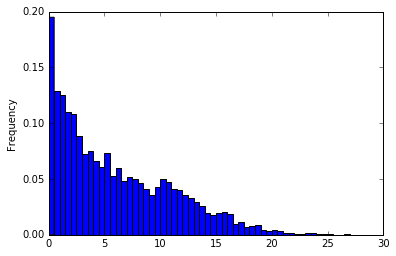

In [52]:
faixa = np.arange(0,30,0.5)
Pts.plot.hist(bins=faixa, normed=1)

No histograma acima foi feita a relação entre frequência relativa por pontos médios

___
### Itens 4 a 6 - Resolução:

4)  O histograma acima parece ter assimetria à disreita uma vez que sua cauda tem uma tendência a se alungar do lado direito do gráfico(positivo). Duas prováveis hipóteses sobre a distribuição teórica de tal variáviel são: distribuição exponencial e distribuição gama. A escolha da primeira é justificada pelo formato do gráfico, uma vez que, conforme os valores de x aumentam, os valores de y diminuem em proporções cada vez menores. A segunda hipótese também é dada pelo formato do gráfico uma vez que quando se ve os gráficos do tipo beta, eles tem partes bem parececidas com o gráfico acima (em determinados parâmetros apenas).

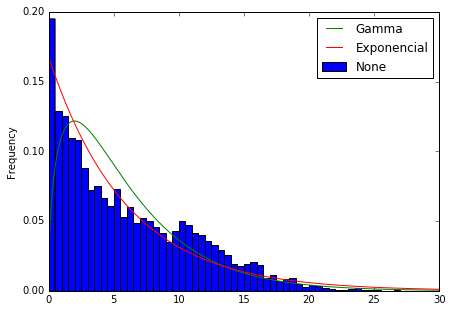

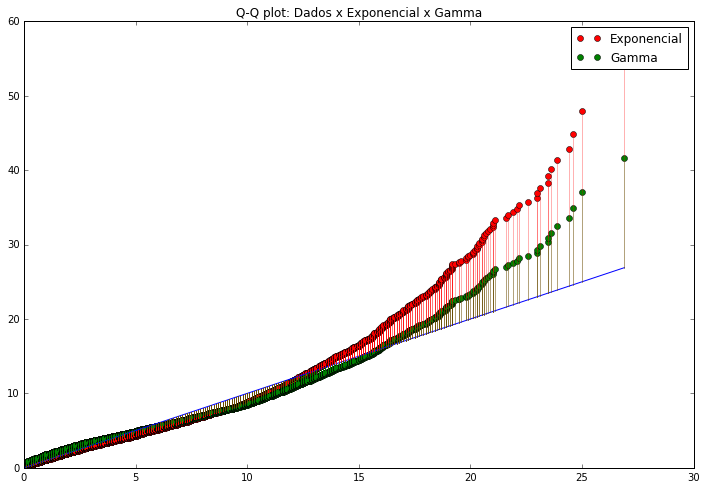

In [297]:
mu_exp = Pts.mean()
k_gamma = 1.5
theta_gamma = Pts.mean()/k_gamma

x = np.linspace(0, 30, 1000)

fig = plt.figure(figsize=(7,5))

exponencial0 = stats.expon.pdf(x, scale=mu_exp, loc=0)
gamma0 = stats.gamma.pdf(x, scale=theta_gamma, loc=0, a=k_gamma)

Pts.plot.hist(bins=faixa, normed = 1)
plt.plot(x, gamma0, '-', color='green', label="Gamma")
plt.plot(x, exponencial0, '-', color='red', label="Exponencial")

plt.legend()

# QQplot

fra = []
for i in range(len(Pts)):
    acc = (i + 0.5) / len(Pts)
    fra.append(acc) 

fra = pd.Series(data=fra)

q_exp0 = stats.expon.ppf(fra, scale=mu_exp, loc=0)
q_gamma0 = stats.gamma.ppf(fra, scale=theta_gamma, loc=0, a=k_gamma)

fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Exponencial x Gamma")

exp_plot0, = plt.plot(Pts, q_exp0, 'o', color="red", label="Exponencial")
gamma_plot0, = plt.plot(Pts, q_gamma0, 'o', color="green", label = "Gamma")

plt.legend(handles=[exp_plot0, gamma_plot0])
plt.plot((min(Pts), max(Pts)), (min(Pts), max(Pts)), '-')


for i in range(len(Pts)):
    plt.plot((Pts[i], Pts[i]), (q_exp0[i], Pts[i]), '-', color='red', alpha=0.3  )
    plt.plot((Pts[i], Pts[i]), (q_gamma0[i], Pts[i]), '-', color='green', alpha=0.3  )



Na célula acima foi feito o histograma junto com as distribuições teóricas exponencial e gamma. Tais parâmetros foram estimados com base em quais ficavam mais parecidos com o histograma no gráfico. A seguir foi feito o Q-Q plot, o qual, basicamente, compara os quantis teóricos com os encontrados.

(-1.2565378480564224e-08, 5.9645824620215633)
(0.94419279049584737, -2.1767226692213971e-25, 6.0088278873256833)


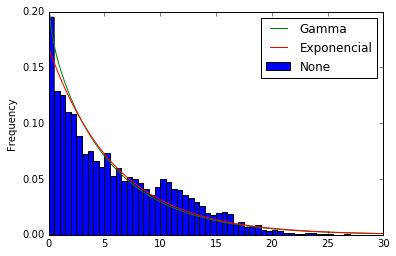

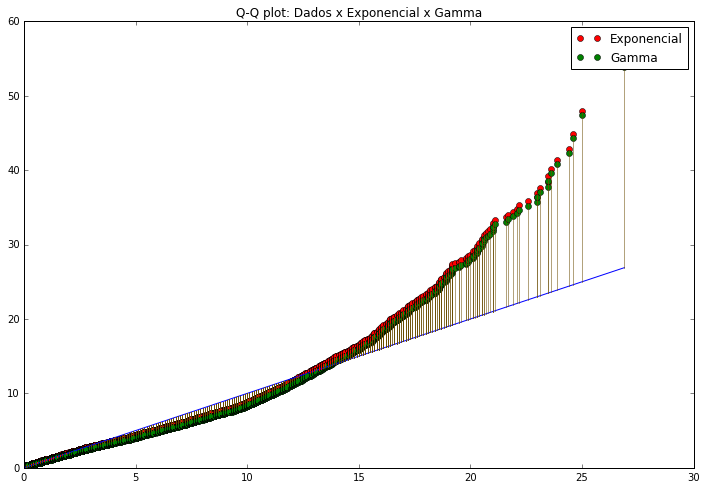

In [252]:
fit_expon = stats.expon.fit(Pts)
fit_gamma = stats.gamma.fit(Pts)
print(fit_expon)
print(fit_gamma)

exponencial1 = stats.expon.pdf(x, scale=fit_expon[1], loc=fit_expon[0])
gamma1 = stats.gamma.pdf(x, scale=fit_gamma[2], loc=fit_gamma[1], a=fit_gamma[0])

Pts.plot.hist(bins=faixa, normed = 1)
plt.plot(x, gamma1, '-', color='green', label="Gamma")
plt.plot(x, exponencial1, '-', color='red', label="Exponencial")
plt.axis([0, 30, 0, 0.2])
plt.legend()

#QQplot
for i in range(len(Pts)):
    acc = (i + 0.5) / len(Pts)
    fra.append(acc) 

fra = pd.Series(data=fra)


q_exp1 = stats.expon.ppf(fra, scale=fit_expon[1], loc=fit_expon[0])
q_gamma1 = stats.gamma.ppf(fra, scale=fit_gamma[2], loc=fit_gamma[1], a=fit_gamma[0])

fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Exponencial x Gamma")

exp_plot1, = plt.plot(Pts, q_exp1, 'o', color="red", label="Exponencial")
gamma_plot1, = plt.plot(Pts, q_gamma1, 'o', color="green", label = "Gamma")

plt.legend(handles=[exp_plot1, gamma_plot1])
plt.plot((min(Pts), max(Pts)), (min(Pts), max(Pts)), '-')


for i in range(len(Pts)):
    plt.plot((Pts[i], Pts[i]), (q_exp1[i], Pts[i]), '-', color='red', alpha=0.3  )
    plt.plot((Pts[i], Pts[i]), (q_gamma1[i], Pts[i]), '-', color='green', alpha=0.3  )



Na célula acima também foi feito o histograma junto com as distribuições teóricas exponencial e gamma, entretanto, tais parâmetros foram estimados com base na função fit() que é própria para estimativa de parâmetros. A seguir, da mesma maneira que na célula anterior, foi feito o Q-Q plot.

___
### Itens 7 a 9 - Resolução:

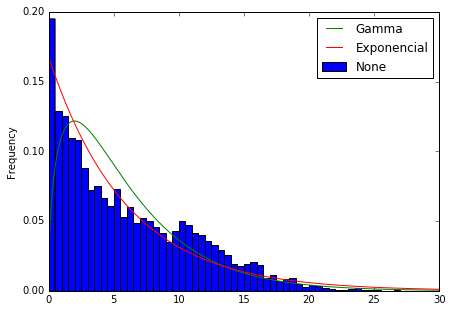

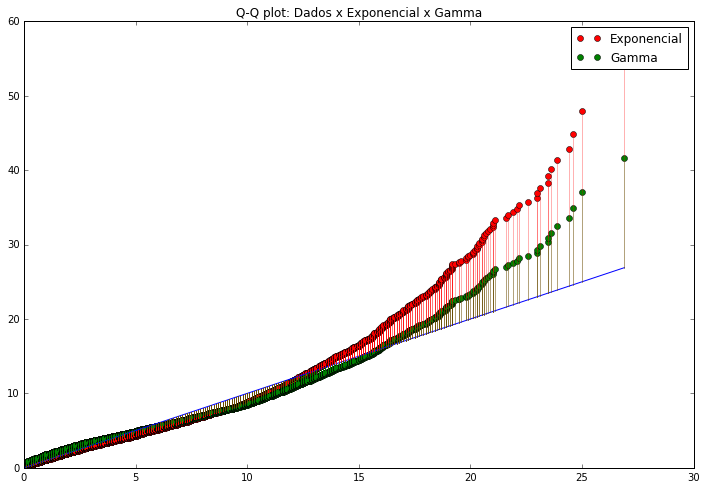

In [305]:

mu_exp = Pts.mean()
k_gamma = 1.5
theta_gamma = Pts.mean()/k_gamma

x = np.linspace(0, 30, 1000)

fig = plt.figure(figsize=(7,5))

exponencial0 = stats.expon.pdf(x, scale=mu_exp, loc=0)
gamma0 = stats.gamma.pdf(x, scale=theta_gamma, loc=0, a=k_gamma)

Pts.plot.hist(bins=faixa, normed = 1)
plt.plot(x, gamma0, '-', color='green', label="Gamma")
plt.plot(x, exponencial0, '-', color='red', label="Exponencial")

plt.legend()

# QQplot

fra = []
for i in range(len(Pts)):
    acc = (i + 0.5) / len(Pts)
    fra.append(acc) 

fra = pd.Series(data=fra)

q_exp0 = stats.expon.ppf(fra, scale=mu_exp, loc=0)
q_gamma0 = stats.gamma.ppf(fra, scale=theta_gamma, loc=0, a=k_gamma)

fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Exponencial x Gamma")

exp_plot0, = plt.plot(Pts, q_exp0, 'o', color="red", label="Exponencial")
gamma_plot0, = plt.plot(Pts, q_gamma0, 'o', color="green", label = "Gamma")

plt.legend(handles=[exp_plot0, gamma_plot0])
plt.plot((min(Pts), max(Pts)), (min(Pts), max(Pts)), '-')


for i in range(len(Pts)):
    plt.plot((Pts[i], Pts[i]), (q_exp0[i], Pts[i]), '-', color='red', alpha=0.3  )
    plt.plot((Pts[i], Pts[i]), (q_gamma0[i], Pts[i]), '-', color='green', alpha=0.3  )



Na célula acima foi copiado o código das primeiras estimativas de parâmetros uma vez que, estes, pareceram mais adequados de acordo com o Q-Q plot feito. No segundo Q-Q plot os dados de ambas as funções se aproximam mais da reta real do que no primeiro Q-Q plot.Tais parâmetro serão utilizados nas próximas análises.

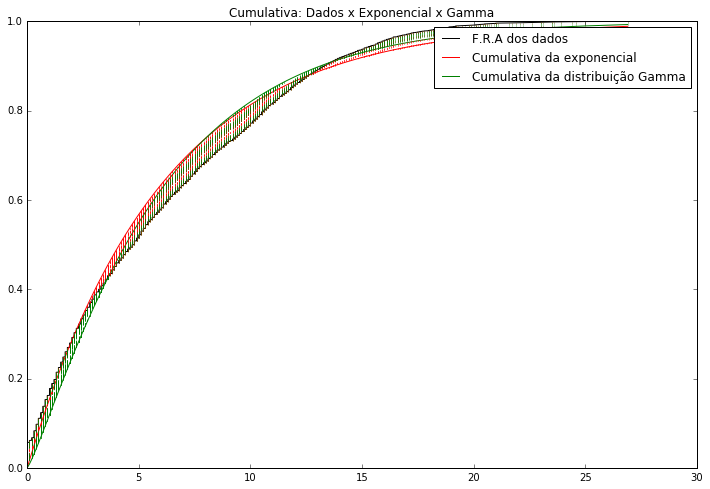

In [296]:
# fra e FDA
cdf_exponencial = stats.expon.cdf(Pts, scale=mu_exp) 
cdf_gamma = stats.gamma.cdf(Pts, scale=theta_gamma, loc=0, a=k_gamma)

fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x Gamma")

dados_fra_plot, = plt.plot(Pts, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(Pts, cdf_exponencial, '-', color='red', label = "Cumulativa da exponencial")
cdf_gamma_plot, = plt.plot(Pts, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")

plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot])


for i in range(len(Pts)):
    plt.plot((Pts[i], Pts[i]), (fra[i], cdf_exponencial[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((Pts[i], Pts[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
    

No gráfico acima foi feita uma comparação entre frequência relativa acumulada prática e a função de distribuição acumulada da função exponencial e gamma. Em tal gráfico pode-se observar que não há uma única função que fica mais próxima dos dados reais, elas se intercalam conforme o x aumenta.

___
### Itens 10 e 11 - Resolução:

In [314]:

erro_quadratico_exponencial = sum((Pts - q_exp0)**2)
erro_quadratico_gamma = sum((Pts - q_gamma0)**2)

print("Erro quadrático da exponencial :{:4.3f}".format(erro_quadratico_exponencial))
print("Erro quadrático da gamma :{:4.3f}".format(erro_quadratico_gamma))

eqm_exp0 = erro_quadratico_exponencial/len(Pts)
eqm_gamma0 = erro_quadratico_gamma/len(Pts)

print("Erro quadratico médio da exponencial :", eqm_exp)
print("Erro quadratico médio da gamma :", eqm_gamma)

soma_diferenças_exponencial = sum(abs(Pts - q_exp0))
soma_diferenças_gamma = sum(abs(Pts - q_gamma0))

print("Soma de diferenças da exponencial :", soma_diferenças_exponencial)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)

# Erro quadrático nas CDFs
erro_quad_cdf_exponencial = sum((fra - cdf_exponencial)**2)
erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)

print("Erro quadrático da CDF da Exponencial versus F.R.A", erro_quad_cdf_exponencial)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)

# Diferenças absolutas
soma_difs_cdf_expoencial = sum( abs(fra - cdf_exponencial))
soma_difs_cdf_gamma = sum( abs(fra - cdf_gamma))

print("Erro da soma do módulo das diferenças da exponencial versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_expoencial, soma_difs_cdf_gamma))

# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_exp = max(abs(fra-cdf_exponencial))
ks_aderencia_gamma = max(abs(fra-cdf_gamma))

print("Teste K-S para a exponencial com μ= 1.4: {:4.3f}\n\
Teste K-S para a gamma com scale=theta_gamma, loc=0 e a=k_gamma  {:4.3f}".format(mu_exp, ks_aderencia_exp, theta_gamma, k_gamma, ks_aderencia_gamma))

Erro quadrático da exponencial :13340.978
Erro quadrático da gamma :4717.846
Erro quadratico médio da exponencial : 2.8702620042
Erro quadratico médio da gamma : 1.10728712981
Soma de diferenças da exponencial : 3609.04352287
Soma de diferenças da gamma : 3551.09039961
Erro quadrático da CDF da Exponencial versus F.R.A 5.17892888614
Erro quadrático da CDF da Gamma versus F.R.A 6.75896418098
Erro da soma do módulo das diferenças da exponencial versus F.R.A: 130.0569155014609 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 158.84257303226144
Teste K-S para a exponencial com μ= 1.4: 5.962
Teste K-S para a gamma com scale=theta_gamma, loc=0 e a=k_gamma  0.060


 |           |  Erro quadrático | Erro quadrático médio | Soma de diferenças| Erro quadrático da CDF versus F.R.A | Erro da soma do módulo | Teste K-S|
|-----------|-------------|------------------|-------------------|
| Gamma      | 4717.846 | 1.10728712981 | 3551.09039961 | 6.75896418098 |158.84257303226144|0.060
| Exponencial| 13340.978 | 2.8702620042 | 3609.04352287 | 5.17892888614 |130.0569155014609 |5.962

Na tabela acima há a comparação as funções gamma e exponencial em cada teste de aderência. Nos testes de erro quadrático da CDF versus F.R.A e erro da soma do módulo a função exponencial parece ser mais adequada para descrever a variável contínua escolhida. Entretando quando se observa o erro quadrático, o erro quadrático médio, a soma de diferenças e o teste de Kolmogorov-Smirnov, é possível de se estimar que a função gamma é a mais adequada pra descrição de tal variável. 

Por fim, chega-se à conclusão que a função gamma é a mais adequada para a descrição da média de pontos por jogo na liga de basquene universitária norte-americana. Tal conclusão se deve tanto à análise dos testes de adêrencia feitos acima, quanto dos Q-Qs plots feitos ao longo da análise. Em ambos os casos a função gamma pareceu corresponder mais adequadamente aos dados da variável contínua escolhida.